In [1]:
import neptune as neptune
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker

from misc import get_neptune_table, get_activations, plot_module, get_steps_from_first_run, pivot_dict, plot_loss_vs_lr

In [2]:
tags = ['muP_MoE', 'test_grid']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (53, 680)
(53, 680)


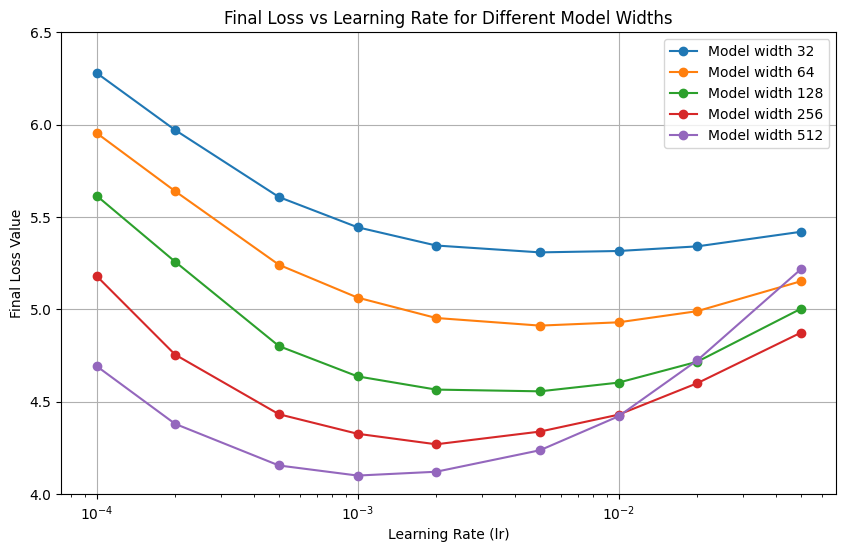

In [3]:
plot_loss_vs_lr(df, (4, 6.5))

In [6]:
tags = ['muP_MoE', 'test_grid', 'learning_rate=2e-3']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (5, 248)
(5, 248)


In [7]:
act_dict = get_activations(df, 'mean')
print(act_dict)


run ID: LLMRANDOM-23287


https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23287
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-23279
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23279
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-23272
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23272
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-23265
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23265
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-23258
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23258
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
{'LLMRANDOM-23287': {'dmodel': 512, 0: {'attn':         step     value               timestamp
0        0.0  0.417969 2024-11-26 13:34:01.940
1      100.0  0.773438 2024-11-26 13:34:09.848
2      200.0  1.187500 2024-11-26 13:34:17.993
3      300.0  2.21

In [8]:
steps = get_steps_from_first_run(act_dict)
layer_num = 0
module='FF'
pivoted_dict = pivot_dict(
    activations_dict=act_dict,
    steps=steps,
    dmodels=[32, 64, 128, 256, 512],
    layer_num=layer_num,
    module=module,
)

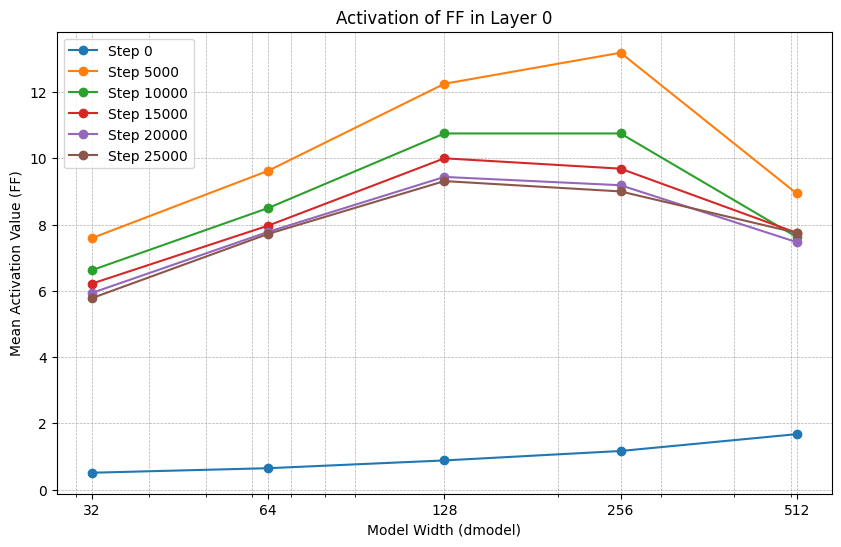

In [9]:
plot_module(
    pivoted_dict=pivoted_dict,
    module_keyword=module,
    layer_num=layer_num,
    step_interval=5000,
)